In [96]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import pandas as pd
import math

In [121]:
class resolver:
    def __init__(self, teammates, n, k):
        self.team = teammates # кол-во людей с тобой в сговоре 
        self.n = n # кол-во участников 
        self.n_without_team = n - 1 - self.team # обычные люди
        self.k = k # коэффициент деления
        self.sum_values=[]

    def equation(self,team_values):
        return np.sum((np.append(self.value,team_values))/(self.n*self.k))
    def near_numbers(self, your_min_number, your_max_number):
        your_win_nums = []
        for value in range(your_min_number,your_max_number+1):
            win_num = round(self.equation(value),0)
            if min(abs(self.value-win_num))>=abs(value-win_num):
                your_win_nums.append(value)
        return your_win_nums
    def exact_numbers(self, your_min_number, your_max_number):
        sum_win = []
        for value in range(your_min_number+self.team, your_max_number+self.team*100):
            win_num = int(round(self.equation(value),0))
            if value <= self.team*100+win_num and value>=win_num+self.team:
                sum_win.append([win_num,value])
        return sum_win
    #def all_win_strategy(self):
    
    
    def all_random(self, iterations, your_min_number, your_max_number):
        result = []
        for iteration in range (iterations):
            self.value = np.array([rd.randint(1, 100) for _ in range(self.n_without_team)])# 100
            result += self.exact_numbers(your_min_number,your_max_number)
        return result
        
    def strategy1(self, iterations, your_min_number, your_max_number):
        result = []
        for iteration in range (iterations):
            n = [self.n_without_team // 2, self.n_without_team-self.n_without_team // 2]
            self.value = np.array([rd.randint(1, 31) for _ in range(n[1])] +\
                                   [rd.randint(69, 100) for _ in range(n[0])]) 
            self.sum_values.append(np.sum(self.value)) # Значение без учета тебя # (n/2+1)*31 + 31n/2
            result += self.exact_numbers(your_min_number,your_max_number)
            #result_1 += self.near_numbers(your_min_number, your_max_number)
        return result
        
    def strategy2(self,iterations, your_min_number, your_max_number):
        result = []
        for iteration in range (iterations):
            thoughtless_n = rd.randint(1,3)
            n = self.n_without_team - thoughtless_n 
            self.value = np.array([rd.randint(1, 15) for _ in range(n)] +\
                                   [rd.randint(31, 100) for _ in range(thoughtless_n)])
            self.sum_values.append(np.sum(self.value)) # Значение без учета тебя
            result += self.exact_numbers(your_min_number,your_max_number)
            #result_1 += self.near_numbers(your_min_number, your_max_number)
        return result
        
    def strategy3(self, iterations, your_min_number, your_max_number):
        result = []
        for iteration in range (iterations):
            sub_n = rd.randint(0,12)
            n = [sub_n, self.n_without_team-sub_n]
            self.value = np.array([rd.randint(1, 25) for _ in range(n[1])] +\
                                   [rd.randint(75, 100) for _ in range(n[0])])
            self.sum_values.append(np.sum(self.value)) # Значение без учета тебя
            result += self.exact_numbers(your_min_number,your_max_number)
            #result_1 += self.near_numbers(your_min_number, your_max_number)
        return result
        
    def strategy4(self, iterations, your_min_number, your_max_number):
        result = []
        for iteration in range(iterations):
            self.value = np.array([rd.randint(3, 15) for _ in range(self.n_without_team)])
            self.sum_values.append(np.sum(self.value)) # Значение без учета тебя
            result += self.exact_numbers(your_min_number,your_max_number)
            #result_1 += self.near_numrfr bers(your_min_number, your_max_number)
        return result
        
    def all_possible_values(self, your_min_number, your_max_number):
        result = []
        for self.value in range (self.n_without_team, self.n_without_team*100):
                result += self.exact_numbers(your_min_number,your_max_number)
                self.sum_values.append(self.value) # Значение без учета тебя
        return result
        
    def my_values(self,sum_values, your_min_number, your_max_number):
        result = []
        if type(self.sum_values)!=list:
            self.sum_values=sum_values
        else:
            self.value = np.array(sum_values)
            self.sum_values=np.sum(sum_values)
        result += self.exact_numbers(your_min_number,your_max_number)
        #result_1 += self.near_numbers(your_min_number, your_max_number)
        return result
    def best_number(self, strategy='strategy1', sum_values = 0, iterations=100, your_min_number=1, your_max_number=35):
        result = []
        result_1 = []
        match strategy: 
            case 'all_random': result = self.all_random(iterations, your_min_number, your_max_number)
            case 'strategy1': result = self.strategy1(iterations, your_min_number, your_max_number)
            case 'strategy2': result = self.strategy2(iterations, your_min_number, your_max_number)
            case 'strategy3': result = self.strategy3(iterations, your_min_number, your_max_number)
            case 'strategy4': result = self.strategy4(iterations, your_min_number, your_max_number)
            case 'all_possible_values': result = self.all_possible_values(your_min_number, your_max_number)
            case 'my_values': result = self.my_values(sum_values, your_min_number, your_max_number)
            case _: return 'Unknown strategy'
        if self.team==0:
            result = [key for key, value in result]
        else:
            res={}
            for key, value in result:
                res.setdefault(key,[]).append(value)
            for key,value in res.items():
                res[key] = [np.array([unique_num, value.count(unique_num)]) for unique_num in set(value)]
            result = res
#==========================  Реальная вероятность, однако с ней не очень приятно работать  ==========================
        # return {unique_num: (result.count(unique_num))/((self.n-1+your_max_number-your_min_number)*100)\
        #         for unique_num in set(result)}
#======================================== Вывод уникальных значений и их кол-во ========================================
        # return {unique_num: (result_1.count(unique_num)) for unique_num in set(result_1)}

            # Программа подбирает значения с которыми вы МОЖЕТЕ выиграть с условием того,
                # что вы предполагаете как поведут себя люди в данной ситуации
        
#====================================  Вывод вероятности выбора значения из интервала ===================================
        # return {unique_num: (result_1.count(unique_num)/len(result_1)) for unique_num in set(result_1)},\
        # {unique_num: (result.count(unique_num)/len(result)) for unique_num in set(result)}
        #return len(result_1), len(result), len(result_2)
        #return {unique_num: (result.count(unique_num)) for unique_num in set(result)}
        return result

In [123]:
test1 = resolver(1,10,3/2)
%time s = test1.best_number(strategy='strategy2', iterations=40, your_min_number = 1, your_max_number=40)

CPU times: user 33 ms, sys: 4.94 ms, total: 38 ms
Wall time: 35.6 ms


In [124]:
s

{15: [array([16,  7]),
  array([17,  7]),
  array([18,  8]),
  array([19,  6]),
  array([20,  6]),
  array([21,  6]),
  array([22,  4]),
  array([23,  4]),
  array([24,  4]),
  array([25,  6]),
  array([26,  7]),
  array([27,  7]),
  array([28,  5]),
  array([29,  5]),
  array([30,  5]),
  array([31,  6]),
  array([32,  6]),
  array([33,  6]),
  array([34,  6]),
  array([35,  6]),
  array([36,  6]),
  array([37,  6]),
  array([38,  6]),
  array([39,  6]),
  array([40,  4]),
  array([41,  4]),
  array([42,  3]),
  array([43,  3]),
  array([44,  3]),
  array([45,  3]),
  array([46,  2]),
  array([47,  2]),
  array([48,  1]),
  array([49,  1]),
  array([50,  2]),
  array([51,  2]),
  array([52,  2]),
  array([53,  3]),
  array([54,  4]),
  array([55,  4]),
  array([56,  3]),
  array([57,  4]),
  array([58,  4]),
  array([59,  4]),
  array([60,  4]),
  array([61,  4]),
  array([62,  4]),
  array([63,  4]),
  array([64,  5]),
  array([65,  4]),
  array([66,  4]),
  array([67,  5]),
  array(

In [125]:
test1 = resolver(2,19,2)
s = test1.best_number(strategy='my_values', sum_values=322, iterations=1, your_min_number = 1, your_max_number=40)
s = pd.DataFrame(s, columns=["win_number", "sum_team_numbers"])
d = []
for i in s['win_number'].unique():
    d.append(s[s['win_number'] == i]['sum_team_numbers'].iloc[0])
d.append(max(s['sum_team_numbers']))
# sns.displot(s,x="sum_team_numbers",col='win_number',kde=True,color='black',height=5,aspect=1,col_wrap=5,bins=d)
sns.displot(s,x="sum_team_numbers",hue='win_number' ,kde=True,color='black',palette="rocket", bins=d)

ValueError: max() iterable argument is empty

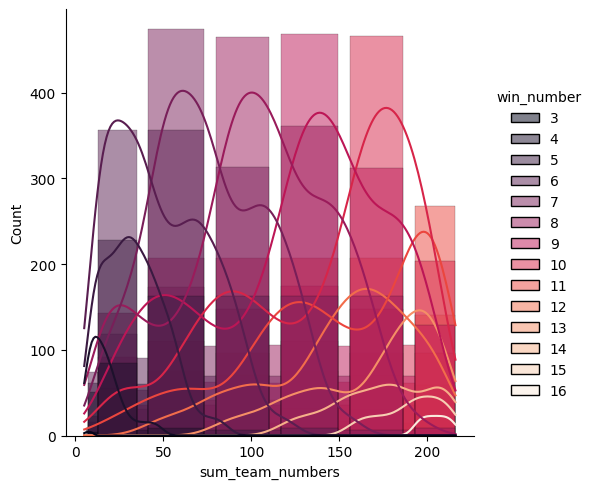

In [95]:
test1 = resolver(2,19,2)
s = test1.best_number(strategy='strategy2', iterations=50, your_min_number = 1, your_max_number=40)
s = pd.DataFrame(s, columns=["win_number", "sum_team_numbers"])
d = []
for i in s['win_number'].unique():
    d.append(s[s['win_number'] == i]['sum_team_numbers'].iloc[0])
d.append(max(s['sum_team_numbers']))
d = np.sort(d)
# sns.displot(s,x="sum_team_numbers",col='win_number',kde=True,color='black',height=5,aspect=1,col_wrap=5,bins=d)
sns.displot(s,x="sum_team_numbers",hue='win_number' ,kde=True,color='black',palette="rocket", bins=d)

<Figure size 1000x600 with 0 Axes>

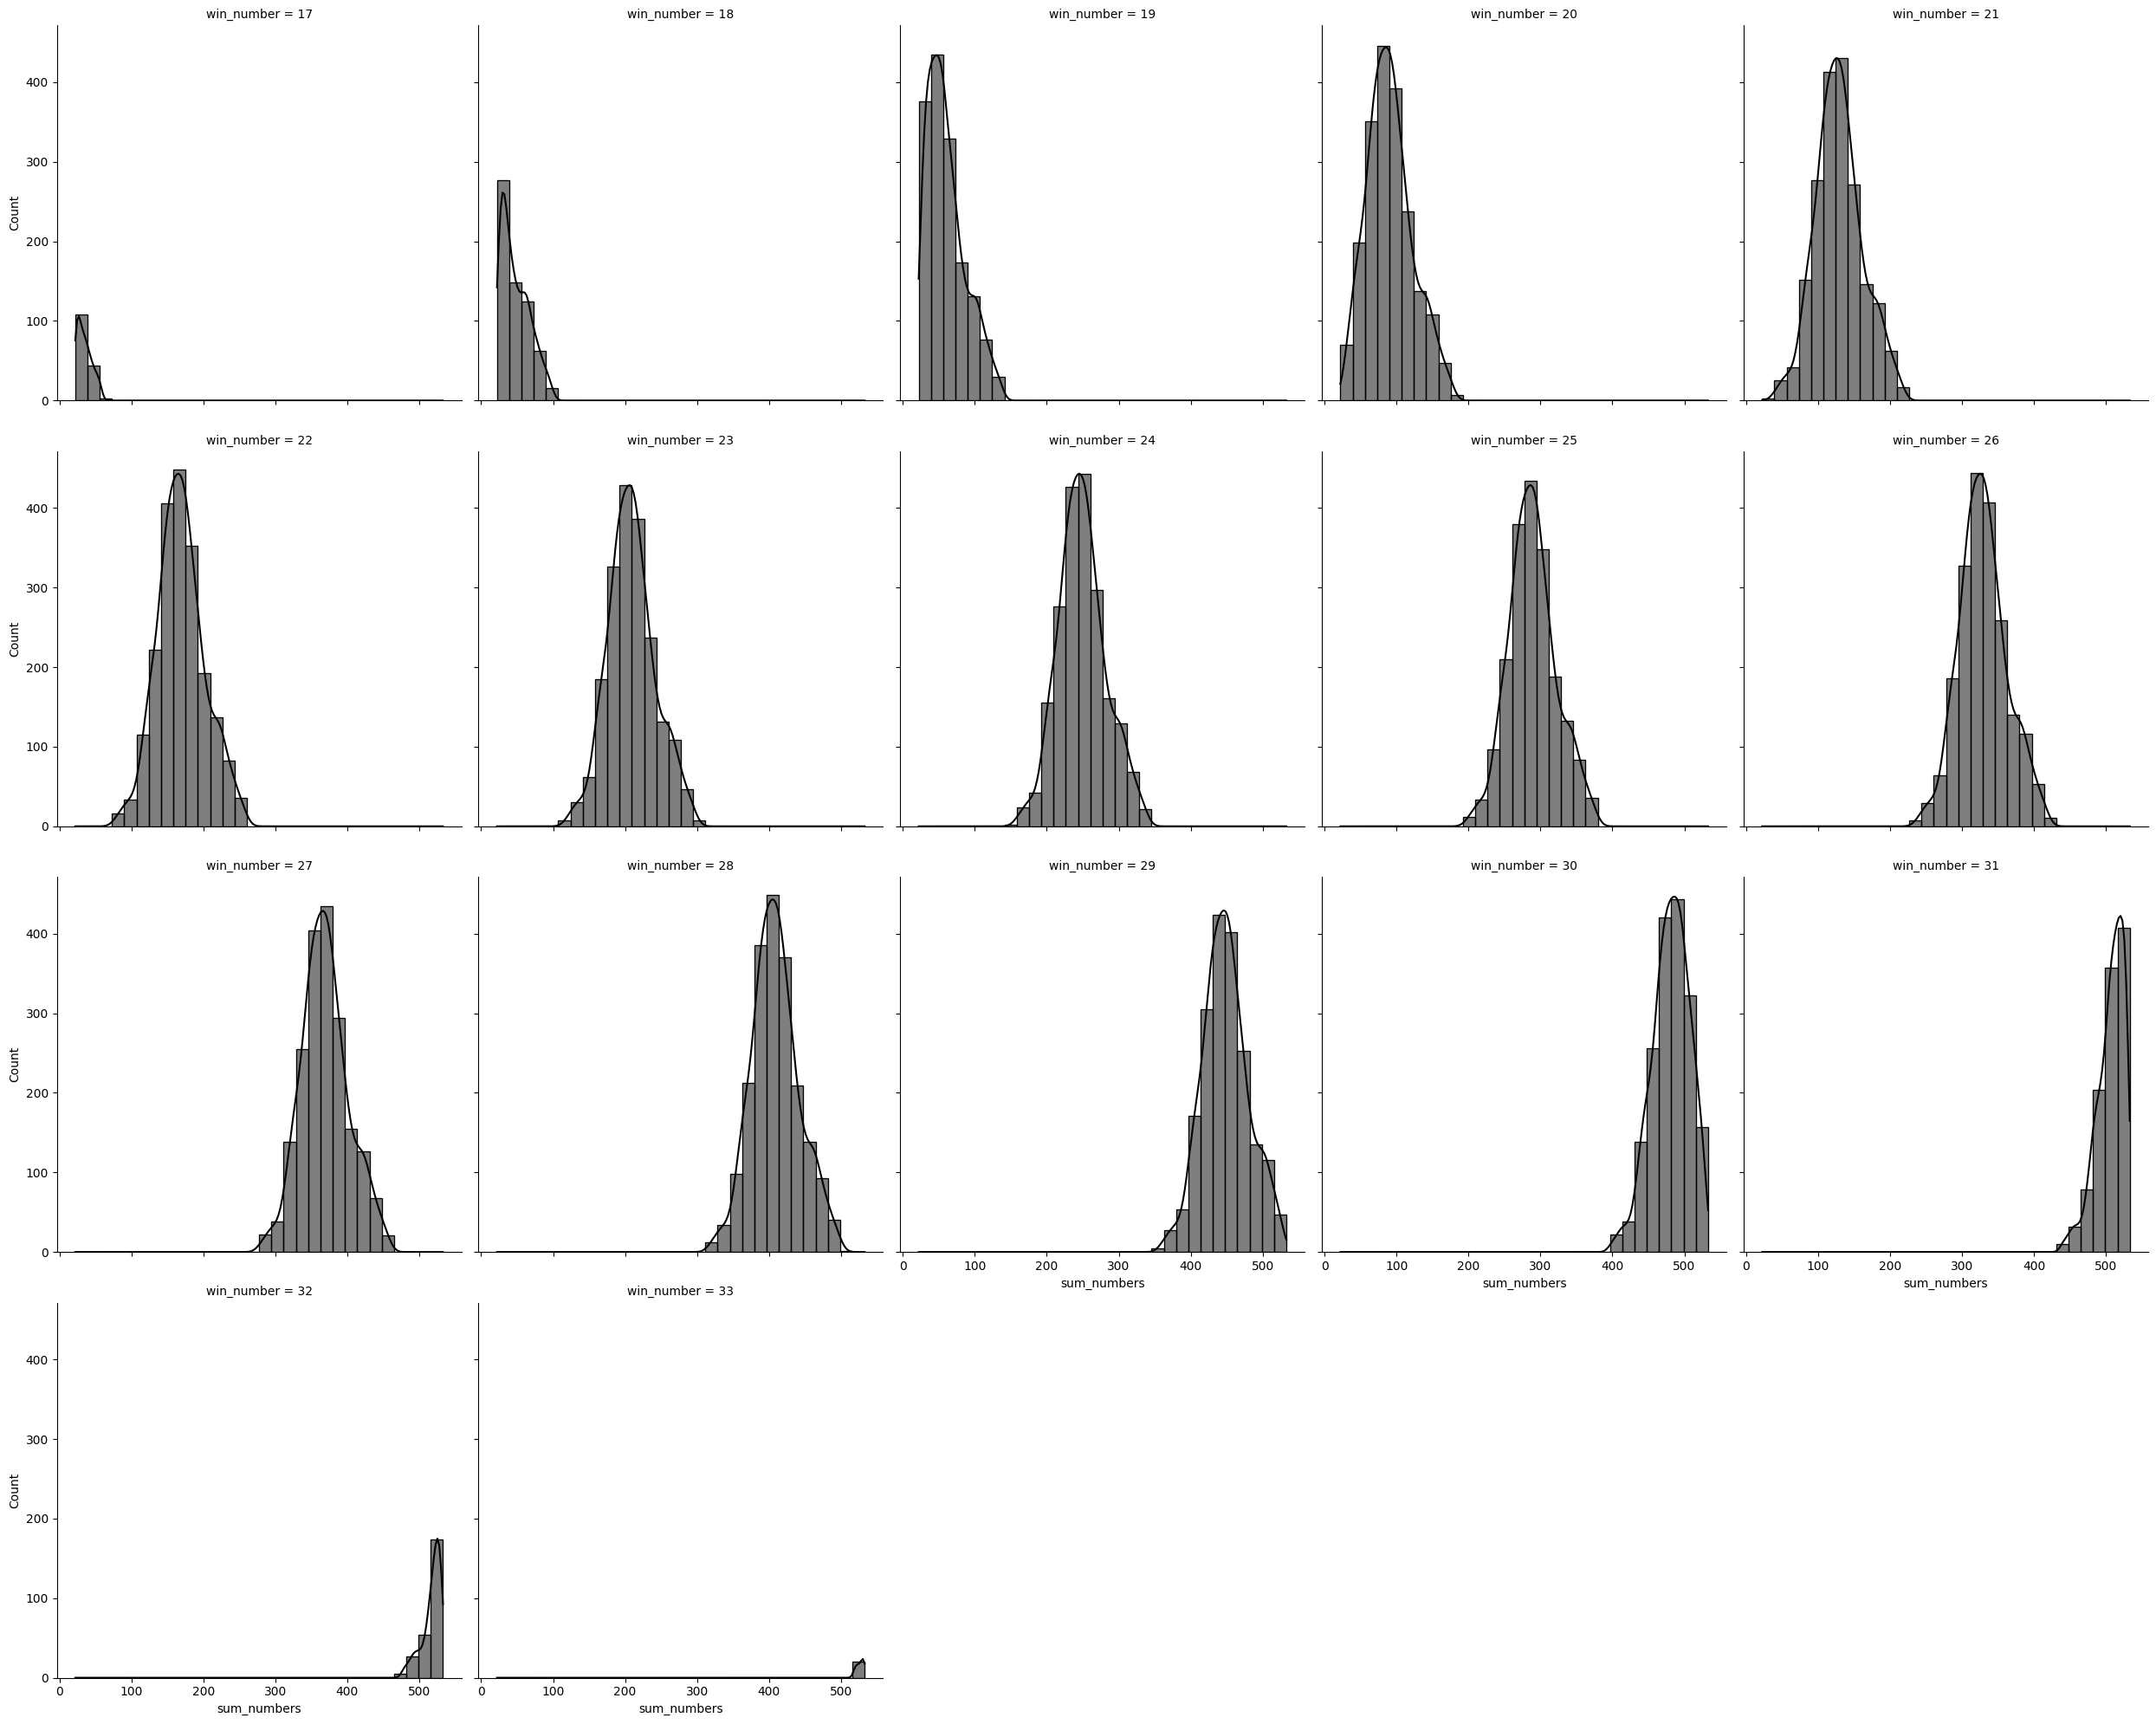

In [40]:
test1 = resolver(5,20,2)
s = test1.best_number(strategy='strategy1', iterations=50, your_min_number = 1, your_max_number=40)
s = pd.DataFrame(s, columns=["win_number", "sum_numbers"])
plt.figure(figsize=(10,6))
ax = sns.displot(s,x="sum_numbers",multiple="stack",col='win_number',kde=True,color='black',col_wrap = 5)
ax

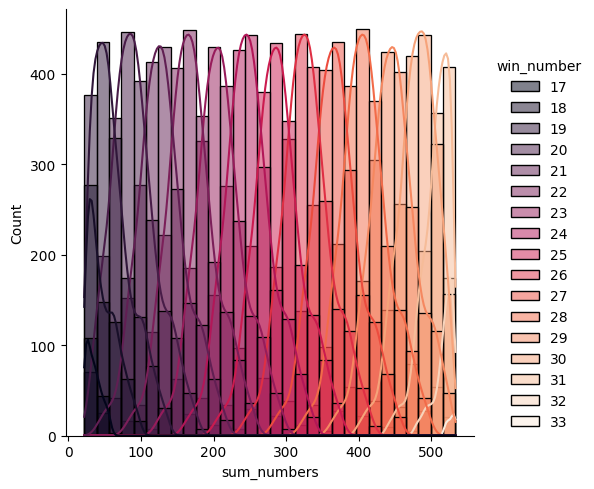

In [42]:
sns.displot(s,x="sum_numbers",hue='win_number' ,kde=True,color='black',palette="rocket")

In [39]:
test1 = resolver(0,20,2)
s = test1.best_number(strategy='strategy2', iterations=100, your_min_number = 1, your_max_number=40)
len(s)

103

In [43]:
test1 = resolver(0,20,2)
s = test1.best_number(strategy='strategy2', iterations=100, your_min_number = 1, your_max_number=40)
len(s)

106

In [44]:
test1 = resolver(0,20,2)
s = test1.best_number(strategy='strategy2', iterations=100, your_min_number = 1, your_max_number=40)
len(s)

102

In [45]:
test1 = resolver(0,20,2)
s = test1.best_number(strategy='strategy3', iterations=100, your_min_number = 1, your_max_number=40)
len(s)

102

In [67]:
test1 = resolver(0,20,2)
s = test1.best_number(strategy='strategy4', iterations=100, your_min_number = 1, your_max_number=40)
len(s)

106

In [66]:
test1 = resolver(0,20,2)
s = test1.best_number(strategy='all_random', iterations=100, your_min_number = 1, your_max_number=40)
len(s)

103

In [65]:
test1 = resolver(0,20,2)
s = test1.best_number(strategy='all_possible_values', iterations=100, your_min_number = 1, your_max_number=50)
len(s)

1928

In [27]:
len(test1.sum_values)

1881

https://seaborn.pydata.org/tutorial/distributions.html

In [155]:
class resolver:
    def __init__(self, teammates, n, k):
        self.team = teammates # кол-во людей с тобой в сговоре 
        self.n = n # кол-во участников 
        self.n_without_team = n - 1 - self.team # обычные люди
        self.k = k # коэффициент деления
        self.sum_values=[]

    def equation(self,team_values):
        return np.sum((np.append(self.value,team_values))/(self.n*self.k))
    def near_numbers(self, your_min_number, your_max_number):
        your_win_nums = []
        for value in range(your_min_number,your_max_number+1):
            win_num = round(self.equation(value),0)
            if min(abs(self.value-win_num))>=abs(value-win_num):
                your_win_nums.append(value)
        return your_win_nums
    def exact_numbers(self, your_min_number, your_max_number):
        sum_win = []
        for value in range(your_min_number+self.team, your_max_number+self.team*100):
            win_num = int(round(self.equation(value),0))
            if value <= self.team*100+win_num and value>=win_num+self.team:
                sum_win.append([win_num,value])
        return sum_win
    #def all_win_strategy(self):
    
    
    def all_random(self, iterations, your_min_number, your_max_number):
        result = []
        for iteration in range (iterations):
            self.value = np.array([rd.randint(1, 100) for _ in range(self.n_without_team)])# 100
            result += self.exact_numbers(your_min_number,your_max_number)
        return result
        
    def strategy1(self, iterations, your_min_number, your_max_number):
        result = []
        for iteration in range (iterations):
            n = [self.n_without_team // 2, self.n_without_team-self.n_without_team // 2]
            self.value = np.array([rd.randint(1, 31) for _ in range(n[1])] +\
                                   [rd.randint(69, 100) for _ in range(n[0])]) 
            self.sum_values.append(np.sum(self.value)) # Значение без учета тебя # (n/2+1)*31 + 31n/2
            result += self.exact_numbers(your_min_number,your_max_number)
            #result_1 += self.near_numbers(your_min_number, your_max_number)
        return result
        
    def strategy2(self,iterations, your_min_number, your_max_number):
        result = []
        for iteration in range (iterations):
            thoughtless_n = rd.randint(1,3)
            n = self.n_without_team - thoughtless_n 
            self.value = np.array([rd.randint(1, 15) for _ in range(n)] +\
                                   [rd.randint(31, 100) for _ in range(thoughtless_n)])
            self.sum_values.append(np.sum(self.value)) # Значение без учета тебя
            result += self.exact_numbers(your_min_number,your_max_number)
            #result_1 += self.near_numbers(your_min_number, your_max_number)
        return result
        
    def strategy3(self, iterations, your_min_number, your_max_number):
        result = []
        for iteration in range (iterations):
            sub_n = rd.randint(0,12)
            n = [sub_n, self.n_without_team-sub_n]
            self.value = np.array([rd.randint(1, 25) for _ in range(n[1])] +\
                                   [rd.randint(75, 100) for _ in range(n[0])])
            self.sum_values.append(np.sum(self.value)) # Значение без учета тебя
            result += self.exact_numbers(your_min_number,your_max_number)
            #result_1 += self.near_numbers(your_min_number, your_max_number)
        return result
        
    def strategy4(self, iterations, your_min_number, your_max_number):
        result = []
        for iteration in range(iterations):
            self.value = np.array([rd.randint(3, 15) for _ in range(self.n_without_team)])
            self.sum_values.append(np.sum(self.value)) # Значение без учета тебя
            result += self.exact_numbers(your_min_number,your_max_number)
            #result_1 += self.near_numrfr bers(your_min_number, your_max_number)
        return result
        
    def all_possible_values(self, your_min_number, your_max_number):
        result = []
        for self.value in range (self.n_without_team, self.n_without_team*100):
                result += self.exact_numbers(your_min_number,your_max_number)
                self.sum_values.append(self.value) # Значение без учета тебя
        return result
        
    def my_values(self,sum_values, your_min_number, your_max_number):
        result = []
        if type(self.sum_values)!=list:
            self.sum_values=sum_values
        else:
            self.value = np.array(sum_values)
            self.sum_values=np.sum(sum_values)
        result += self.exact_numbers(your_min_number,your_max_number)
        #result_1 += self.near_numbers(your_min_number, your_max_number)
        return result

    

        
    def best_number(self, strategy='strategy1', sum_values = 0, iterations=100, your_min_number=1, your_max_number=35):
        result = []
        result_1 = []
        strat = {
            'all_random' : self.all_random(iterations, your_min_number, your_max_number),
            'strategy1' : self.strategy1(iterations, your_min_number, your_max_number),
            'strategy2' : self.strategy2(iterations, your_min_number, your_max_number),
            'strategy3' : self.strategy3(iterations, your_min_number, your_max_number),
            'strategy4' : self.strategy4(iterations, your_min_number, your_max_number),
            'all_posible_values' : self.all_possible_values(your_min_number, your_max_number),
            'my_values' : self.my_values(sum_values, your_min_number, your_max_number)
        }
        result = strat[strategy]
        if self.team==0:
            result = [key for key, value in result]
        else:
            res={}
            for key, value in result:
                res.setdefault(key,[]).append(value)
            for key,value in res.items():
                res[key] = [[unique_num, value.count(unique_num)] for unique_num in set(value)]
            result = res
#==========================  Реальная вероятность, однако с ней не очень приятно работать  ==========================
        # return {unique_num: (result.count(unique_num))/((self.n-1+your_max_number-your_min_number)*100)\
        #         for unique_num in set(result)}
#======================================== Вывод уникальныrfr х значений и их кол-во ========================================
        # return {unique_num: (result_1.count(unique_num)) for unique_num in set(result_1)}

            # Программа подбирает значения с которыми вы МОЖЕТЕ выиграть с условием того,
                # что вы предполагаете как поведут себя люди в данной ситуации
        
#====================================  Вывод вероятности выбора значения из интервала ===================================
        # return {unique_num: (result_1.count(unique_num)/len(result_1)) for unique_num in set(result_1)},\
        # {unique_num: (result.count(unique_num)/len(result)) for unique_num in set(result)}
        #return len(result_1), len(result), len(result_2)
        # return {unique_num: (result_2.count(unique_num)) for unique_num in set(result_2)}
        return result


In [154]:
test1 = resolver(0,10,3/2)
%time s = test1.best_number(strategy='strategy2', iterations=10000, your_min_number = 1, your_max_number=40)

CPU times: user 5.8 s, sys: 4.99 ms, total: 5.81 s
Wall time: 5.81 s


In [92]:
test1 = resolver(0,10,3/2)
%time s = test1.best_number(strategy='strategy2', iterations=10000, your_min_number = 1, your_max_number=40)

CPU times: user 2.04 s, sys: 9 ms, total: 2.05 s
Wall time: 2.05 s
